# Task 1: Regression model for predicting property prices

## Exploratory data analysis and pre-processing

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump
import json
import time
import os
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
#import catboost as cb
from sklearn.linear_model import Lasso

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [ ]:
df = pd.read_csv('/content/data_1.csv')

In [ ]:
df

In [ ]:
#drop null values
df = df.dropna()
df

In [ ]:
df = pd.read_csv("/content/imputerP2.csv")

In [ ]:
df = df[list(df.columns)[1:]]

In [ ]:
df.describe()

In [ ]:
def catigories(df, column):
  one_hot_encoded = pd.get_dummies(df[column], prefix=column)

  new_column_names = ['{}'.format(col) for col, value in zip(one_hot_encoded.columns, one_hot_encoded.columns)]
  one_hot_encoded.columns = [f'{x.split("_")[0]}_{int(float(x.split("_")[1]) * 10)}' for x in new_column_names]
  df = df.join(one_hot_encoded)

  return df.drop(column, axis=1)

In [ ]:
df = catigories(df, 'floors')
#df.head(10)

In [ ]:
df = catigories(df, 'view')
#df.head(10)

In [ ]:
df = catigories(df, 'condition')
#df.head(10)

In [ ]:
base_year = 1900

df['yr_built_encoded'] = df['yr_built'] - base_year
df = df.drop('yr_built', axis=1)

In [ ]:
# Perform numerical encoding
df['yr_renovated_encoded'] = df['yr_renovated'] - base_year
df.loc[df['yr_renovated_encoded'] == -1900, 'yr_renovated_encoded'] = 0
df = df.drop('yr_renovated', axis=1)

In [ ]:
# Perform frequency encoding
zipcode_counts = df['zipcode'].value_counts()
df['zipcode_freq_encoded'] = df['zipcode'].map(zipcode_counts)
df = df.drop('zipcode', axis=1)

In [ ]:
df['date'] = df['date'].str[4:6]
df = catigories(df, 'date')

In [ ]:
df = df.drop('id', axis=1)
df

In [ ]:
df.boxplot(column=['bedrooms'])

In [ ]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
# remove the clear outlier
df = df.drop(df[df['bedrooms'] ==33].index)

In [ ]:
df[df['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,sqft_above,sqft_basement,lat,...,date_30,date_40,date_50,date_60,date_70,date_80,date_90,date_100,date_110,date_120


In [ ]:
df.describe()

In [ ]:
L = '+'.join([x for x in list(df.columns) if x not in ['id', 'price', 'date', 'floors']])
#print(L)
reg_multi = smf.ols('price~'+L, data=df).fit()
print(reg_multi.summary())

In [ ]:
df.to_csv("data_input0.csv")

In [ ]:
print(df.describe())

## Visualisation

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt

data = [len(df[df['date_10']==1]), len(df[df['date_20']==1]), len(df[df['date_30']==1]), len(df[df['date_40']==1]), len(df[df['date_50']==1]), len(df[df['date_60']==1]), len(df[df['date_70']==1]), len(df[df['date_80']==1]), len(df[df['date_90']==1]), len(df[df['date_100']==1]), len(df[df['date_110']==1]), len(df[df['date_120']==1])]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots()
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.bar(months, data, color="#6fa8dcff")
for i, value in enumerate(data):
    ax.text(i, value, str(value), ha='center', va='bottom', color='gray')
ax.set_xlabel('Months')
ax.set_ylabel('Number of Houses')
ax.set_title('Number of Houses Bought by Month')
ax.set_xticklabels(months, rotation=45)
plt.savefig('Number of Houses Bought by Month.png', transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

data = [df[df['date_10']==1]["price"].mean(), df[df['date_20']==1]["price"].mean(), df[df['date_30']==1]["price"].mean(), df[df['date_40']==1]["price"].mean(), df[df['date_50']==1]["price"].mean(), df[df['date_60']==1]["price"].mean(), df[df['date_70']==1]["price"].mean(), df[df['date_80']==1]["price"].mean(), df[df['date_90']==1]["price"].mean(), df[df['date_100']==1]["price"].mean(), df[df['date_110']==1]["price"].mean(), df[df['date_120']==1]["price"].mean()]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
color = "#6fa8dcff"

fig, ax = plt.subplots()
ax.bar(months, data, color=color)
for i, value in enumerate(data):
    ax.text(i, value, str(int(value//1000))+'K', ha='center', va='bottom', color='gray')

ax.set_xlabel('Months')
ax.set_ylabel('Average Price')
ax.set_title('Average Price of Houses Bought per Month')
ax.set_xticklabels(months, rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.savefig('Average Price of Houses Bought per Month.png', transparent=True)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns for the pair plot
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']

# Create the pair plot with modified height
pairplot = sns.pairplot(df[columns], plot_kws={'color': '#6fa8dc'}, height=1.5)

# Visualize pairwise relationships between multiple variables
plt.savefig('Visualize pairwise relationships between multiple variables.png', transparent=True)
plt.show()


In [ ]:
df_2 = pd.read_csv('/content/data_1.csv')

In [ ]:
df_2

In [ ]:
cond = [len(df_2[df_2['condition']==x])/len(df_2) for x in range(1, 6)]

In [ ]:
cond

In [ ]:
import matplotlib.pyplot as plt

labels = ["C "+str(x) for x in range(1, 6)]
sizes = cond.copy()
sizes[0] = 0
sizes[1] = 0
filtered_labels = [label for label, size in zip(labels, sizes) if size != 0]
filtered_sizes = [size for size in sizes if size != 0]

explode = (0.1,) * len(filtered_labels)
colors = ['#60ffc6', '#c3c3c3', '#6fa8dc', '#fcabf4', "#f0fcab"]
fig1, ax1 = plt.subplots()
patches, _, _ = ax1.pie(filtered_sizes, explode=explode, labels=filtered_labels, autopct='%1.1f%%',
                        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='#f0fcab'),
                  plt.Rectangle((0, 0), 1, 1, color='#fcabf4')]
legend_labels = ['C1: '+str(cond[0]*100)[1:3]+'%', "C2: "+str(cond[1]*100)[1:3]+'%']

plt.legend(legend_handles, legend_labels, loc='upper right')

plt.suptitle('Number of houses sold by condition', fontsize=16)
plt.savefig("Number of houses sold by condition.png", transparent=True)
plt.show()


## Data normalization

In [ ]:
df.isnull().sum()

In [ ]:
df = df.sample(frac=1, random_state=42)
y = df['price'].to_numpy()
X = df.drop('price', axis=1).to_numpy()

In [ ]:
df.to_csv("base.csv")

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

In [ ]:
import pickle

# Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17288, 43), (4322, 43), (17288, 1), (4322, 1))

In [ ]:
print(X_train[0])

[0.18181818 0.125      0.04301887 0.00125936 0.         0.41666667
 0.0625     0.         0.83496863 0.11627907 0.15505077 0.00373213
 1.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.00869565 0.
 0.39201452 0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.        ]


## Model selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

class RegressorTrainer:

  def __init__(self, algorithm='decision_tree', **kwargs):
    self.algorithm = algorithm

    if algorithm == 'decision_tree':
      self.model = DecisionTreeRegressor()
    elif algorithm == 'random_forest':
      self.model = RandomForestRegressor()
    elif algorithm == 'linear_regression':
      self.model = LinearRegression()
    elif algorithm == 'ridge_regression':
      self.model = Ridge()
    elif algorithm == 'sgd':
      self.model = SGDRegressor()
    elif algorithm == 'svm':
      self.model = SVR()
    elif algorithm == 'linear_svm':
      self.model = LinearSVR()
    elif algorithm == 'knn':
      self.model = KNeighborsRegressor()
    elif algorithm == 'adaboost':
      self.model = AdaBoostRegressor()
    elif algorithm == 'gradient_boost':
      self.model = GradientBoostingRegressor()
    else:
      raise ValueError("Invalid algorithm specified")

  def train(self, X, y):
    self.model.fit(X, y)

  def predict(self, X):
    return self.model.predict(X)

  def evaluate(self, X_test, y_test):
    y_pred = self.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        'Algo': self.algorithm,
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

In [ ]:

def train_list_models(list_model, X_tarin, Y_train, X_test, Y_test, path):
  r_2 = {}
  mse = {}
  mae = {}
  for algo in list_model:
    start = time.time()
    testModel = RegressorTrainer(algo)
    #train model
    testModel.train(X_tarin, Y_train)
    end = time.time()
    #test model
    model_eval = testModel.evaluate(X_test, Y_test)
    r_2[algo] = model_eval['r2']
    mse[algo] = model_eval['mse']
    mae[algo] = model_eval['mae']
    model_eval["T_time"] = end - start
    #save the model
    #the_model = path+algo+'.model'
    #dump(testModel.model, the_model)
    ##save rapport of the model
    #json_file = path+algo+"_data.json"
    #with open(json_file, "w") as json_file:
    #  json.dump(model_eval, json_file)
    print(algo+" algo has trained")
  return r_2, mse, mae

In [ ]:
list_model = ['random_forest','decision_tree', 'linear_regression', 'ridge_regression', 'sgd', 'svm', 'linear_svm', 'knn', 'adaboost', 'gradient_boost']
r2, mse, mae = train_list_models(list_model, X_train, y_train, X_test, y_test, "/content/drive/MyDrive/hackathon/Models/")

<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm algo has trained
knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained


In [ ]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                704       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
136/136 [==============================] - 1s 3ms/step - loss: 0.0279 - val_loss: 0.0068
Epoch 2/15
136/136 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 3/15
136/136 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 4/15
136/136 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 5/15
136/136 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/15
136/136 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/15
136/136 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/15
136/136 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 9.1852e-04
Epoch 9/15
136/136 [==============================] - 1s 4ms/step - loss: 9.1398e-04 - val_loss: 8.6004e-04
Epoch 10/15
136/136 [==============================] - 1s 4ms/step - loss: 8.5095e-04 - 

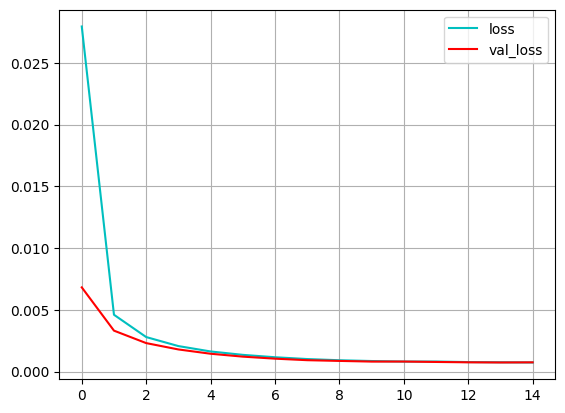

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['loss'], color='c')
plt.plot(hist.history['val_loss'], color='red')
#plt.title('CNN model loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['sequential'] = r_2
print("R2 Score:", r_2)

136/136 [==============================] - 0s 2ms/step
R2 Score: 0.6940237275197392


In [ ]:
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['sequential'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse['sequential'] = m_se
print("MSE:", m_se)

MAE: 0.017324341066268987
MSE: 0.0007441076084277875


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
136/136 [==============================] - 2s 5ms/step - loss: 0.0962
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 8.6444e-04
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 8.0313e-04
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 7.4771e-04
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 7.0830e-04
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 6.7848e-04
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 6.4370e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 6.2064e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 5.9570e-04
Epoch 12/100
136/136 [==============================] - 0s 3ms/s

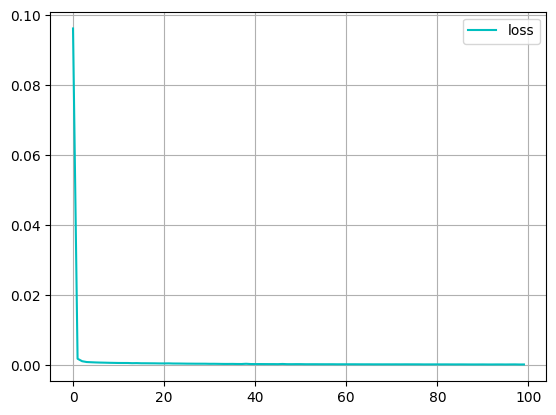

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['loss'], color='c')
#plt.title('CNN model loss')
plt.legend(['loss'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['sequential_2'] = r_2
print("R2 Score:", r_2)

136/136 [==============================] - 0s 1ms/step
R2 Score: 0.8147469748130236


In [ ]:
m_ae = mean_absolute_error(y_test, y_pred)
mae['sequential_2'] = m_ae
print("MAE:", m_ae)

# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse['sequential_2'] = m_se
print("MSE:", m_se)

MAE: 0.01180682892305216
MSE: 0.0004505192000951203


In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

In [ ]:
y_pred = xg_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['xgb'] = r_2
print("R2 Score:", r_2)

R2 Score: 0.8912678237163637


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['xgb'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse['xgb'] = m_se
print("MSE:", m_se)

MAE: 0.008870982323964303
MSE: 0.00026442716945898067


In [ ]:
lgbm_reg = lgb.LGBMRegressor(random_state=42)

# Train the model
lgbm_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(random_state=42)

In [ ]:
y_pred = lgbm_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2["lgb"] = r_2
print("R2 Score:", r_2)

R2 Score: 0.8851787206469639


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae["lgb"] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse["lgb"] = m_se
print("MSE:", m_se)

MAE: 0.008989027070586129
MSE: 0.000279235337052217


In [ ]:
bagging_reg = BaggingRegressor(random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(random_state=42)

In [ ]:
y_pred = bagging_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2["bagging_reg"] = r_2
print("R2 Score:", r_2)

R2 Score: 0.8569776654851965


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae["bagging_reg"] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse["bagging_reg"] = m_se
print("MSE:", m_se)

MAE: 0.009869908457681249
MSE: 0.00034781784360235013


In [ ]:
extra_trees_reg = ExtraTreesRegressor(random_state=42)

# Train the model
extra_trees_reg.fit(X_train, y_train)

<ipython-input-82-b4e0674657d0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_reg.fit(X_train, y_train)


ExtraTreesRegressor(random_state=42)

In [ ]:
y_pred = extra_trees_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['extra_trees_reg'] = r_2
print("R2 Score:", r_2)

R2 Score: 0.8786353297240204


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['extra_trees_reg'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse['extra_trees_reg'] = m_se
print("MSE:", m_se)

MAE: 0.008266313895310283
MSE: 0.00021116928170991883


In [ ]:
catboost_reg = cb.CatBoostRegressor(random_state=42)

# Train the model
catboost_reg.fit(X_train, y_train)

Learning rate set to 0.064231
0:	learn: 0.0459781	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.0441432	total: 78.8ms	remaining: 39.3s
2:	learn: 0.0424563	total: 93.8ms	remaining: 31.2s
3:	learn: 0.0408209	total: 107ms	remaining: 26.6s
4:	learn: 0.0394031	total: 122ms	remaining: 24.4s
5:	learn: 0.0380408	total: 136ms	remaining: 22.5s
6:	learn: 0.0367537	total: 150ms	remaining: 21.3s
7:	learn: 0.0355792	total: 175ms	remaining: 21.7s
8:	learn: 0.0344448	total: 195ms	remaining: 21.5s
9:	learn: 0.0334053	total: 210ms	remaining: 20.8s
10:	learn: 0.0324449	total: 224ms	remaining: 20.2s
11:	learn: 0.0315904	total: 239ms	remaining: 19.7s
12:	learn: 0.0307621	total: 255ms	remaining: 19.4s
13:	learn: 0.0300132	total: 268ms	remaining: 18.9s
14:	learn: 0.0292670	total: 284ms	remaining: 18.7s
15:	learn: 0.0284963	total: 301ms	remaining: 18.5s
16:	learn: 0.0278002	total: 315ms	remaining: 18.2s
17:	learn: 0.0271662	total: 331ms	remaining: 18.1s
18:	learn: 0.0265871	total: 344ms	remaining: 17.8s
19:	lear

In [ ]:
y_pred = catboost_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2["catboost_reg"] = r_2
print("R2 Score:", r_2)

R2 Score: 0.9131674116107288


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae["catboost_reg"] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse["catboost_reg"] = m_se
print("MSE:", m_se)

MAE: 0.008266313895310283
MSE: 0.00021116928170991883


In [ ]:
catboost_reg.save_model('/content/drive/MyDrive/hackathon/Models/catboost_reg_model.bin')
json_file = "/content/drive/MyDrive/hackathon/Models/catboost_model_data.json"
model_eval = {"r2":r2, "mse": mse, "mae": mae}
with open(json_file, "w") as json_file:
  json.dump(model_eval, json_file)

In [ ]:
lasso = Lasso(alpha=1e-5)

lasso.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [ ]:
y_pred = lasso.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2["Lasso"] = r_2
print("R2 Score:", r_2)

R2 Score: 0.715485367043849


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae["Lasso"] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
mse["Lasso"] = m_se
print("MSE:", m_se)

MAE: 0.016538643776350843
MSE: 0.0006919147729187696


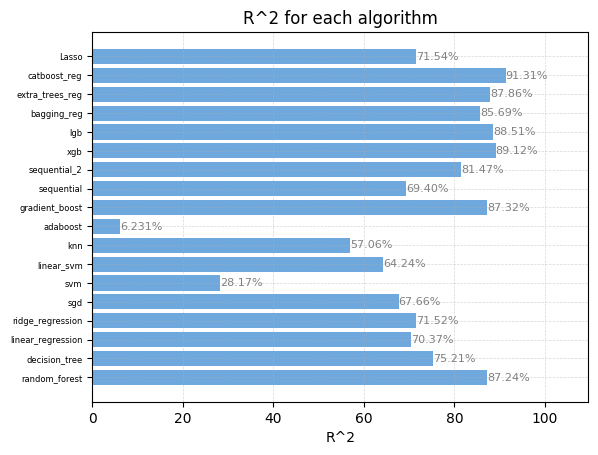

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in r2.values()]
algo = list(r2.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):

    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('R^2')
ax.set_title('R^2 for each algorithm')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('R_2 for each algorithm.png', transparent=True)
plt.show()


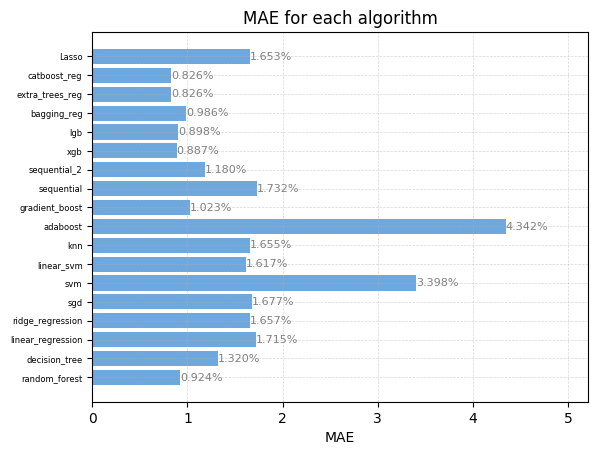

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in mae.values()]
algo = list(mae.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):

    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('MAE')
ax.set_title('MAE for each algorithm')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('MAE for each algorithm.png', transparent=True)
plt.show()


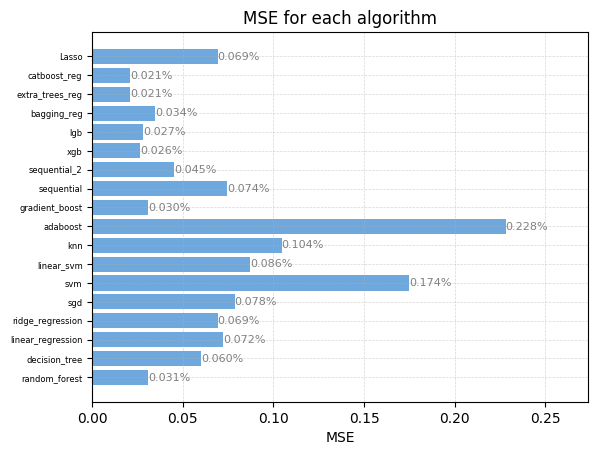

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in mse.values()]
algo = list(mse.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):

    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('MSE')
ax.set_title('MSE for each algorithm')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('MSE for each algorithm.png', transparent=True)
plt.show()


##PCA

In [ ]:
def display_scree_plot(pca):
  scree = pca.explained_variance_ratio_ * 100
  plt.bar(np.arange(len(scree)) + 1, scree, color="#6fa8dcff")
  plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="silver", marker='o')
  for i, value in enumerate(scree.cumsum()):
      plt.text(i + 1, value, f'{value:.1f}', ha='center', va='bottom', color='black', fontsize=8)
  plt.xlabel("rang de l'axe d'inertie")
  plt.ylabel("pourcentage d'inertie")
  plt.title("Eboulis des valeurs propres")
  plt.show(block=False)
  plt.show()


In [ ]:
pca = PCA(n_components=20)

pca.fit(X_normalized)

transformed_data = pca.transform(X_normalized)

explained_variance_ratio = pca.explained_variance_ratio_
print("Transformed Data:")
print(transformed_data)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Transformed Data:
[[-0.93414081  0.13220012 -0.09007362 ... -0.09245757  0.30265564
  -0.0350806 ]
 [ 0.65673474  0.90744651  0.86887157 ...  0.0337345  -0.24152253
  -0.00524728]
 [-0.9224149   0.12287425 -0.22947079 ... -0.04465842 -0.2303523
  -0.05161123]
 ...
 [ 1.05634759  0.38452638 -0.2983706  ... -0.10424285  0.38203507
  -0.03179181]
 [ 0.20704506 -0.74160043 -0.145719   ... -0.05101303  0.06161813
   0.00330414]
 [ 0.19646712 -0.72531211 -0.19055824 ... -0.01403258 -0.30006509
   0.09200943]]

Explained Variance Ratio:
[0.22554716 0.11712974 0.05713092 0.04943392 0.04417085 0.04217844
 0.04087599 0.03960076 0.03811991 0.03558842 0.03481542 0.03335003
 0.02871572 0.02675979 0.02569695 0.0239704  0.02019948 0.01883582
 0.01812581 0.01356633]


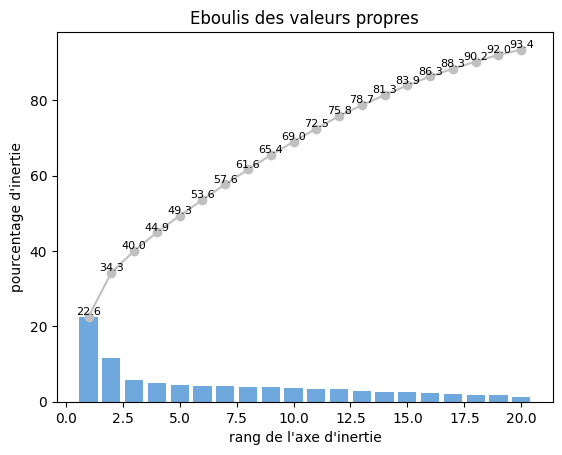

In [ ]:
display_scree_plot(pca)

In [ ]:
print(f'Explained variance ratio for PC: {sum(explained_variance_ratio)}')

Explained variance ratio for PC: 0.9338118376385061


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y_normalized, test_size=0.2, random_state=42)

In [ ]:
list_model = ['random_forest','decision_tree', 'linear_regression', 'ridge_regression', 'sgd', 'svm', 'linear_svm', 'knn', 'adaboost', 'gradient_boost']
r2, mse, mae = train_list_models(list_model, X_train, y_train, X_test, y_test, "/content/drive/MyDrive/hackathon/PCA/")

<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm algo has trained
knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
136/136 [==============================] - 3s 5ms/step - loss: 0.0050
Epoch 2/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 3/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 4/100
136/136 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 5/100
136/136 [==============================] - 0s 4ms/step - loss: 9.7158e-04
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 9.1825e-04
Epoch 7/100
136/136 [==============================] - 0s 4ms/step - loss: 8.8291e-04
Epoch 8/100
136/136 [==============================] - 1s 4ms/step - loss: 8.6467e-04
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 8.2352e-04
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 8.0934e-04
Epoch 11/100
136/136 [==============================] - 0s 2ms/step - loss: 7.8236e-04
Epoch 12/100
136/136 [==============================] - 0s 2ms/step 

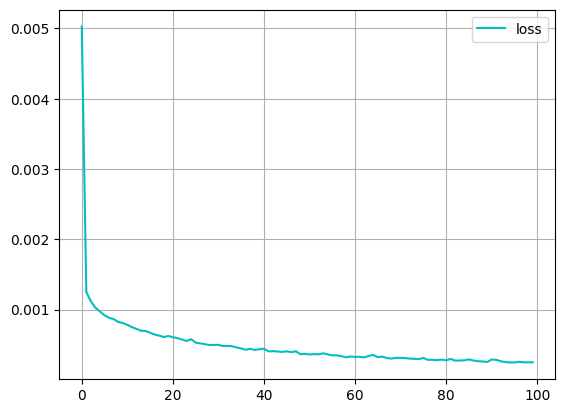

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['loss'], color='c')
#plt.title('')
plt.legend(['loss'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['sequential'] = r_2
print("R2 Score:", r_2)

136/136 [==============================] - 0s 2ms/step
R2 Score: 0.6415272979917157


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['sequential'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['sequential'] = m_se

MAE: 0.015085118483237731
MSE: 0.0008717743464740045


In [ ]:
# Create the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

In [ ]:
y_pred = xg_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['xgb'] = r_2
print("R2 Score:", r_2)

R2 Score: 0.7154806332650961


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['xgb'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['xgb'] = m_se

MAE: 0.014462177652119748
MSE: 0.000691926285055832


In [ ]:
lgbm_reg = lgb.LGBMRegressor(random_state=42)

# Train the model
lgbm_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(random_state=42)

In [ ]:
y_pred = lgbm_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['lgb'] = r_2
print("R2 Score:", r_2)

R2 Score: 0.7136371844968572


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['lgb'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['lgb'] = m_se

MAE: 0.014451968473103573
MSE: 0.0006964093916806501


In [ ]:
# Create the BaggingRegressor
bagging_reg = BaggingRegressor(random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(random_state=42)

In [ ]:
y_pred = bagging_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)
r2['bagging_reg'] = r_2
print("R2 Score:", r_2)

R2 Score: 0.666208510813694


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['bagging_reg'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['bagging_reg'] = m_se

MAE: 0.015274793484093331
MSE: 0.0008117517895051653


In [ ]:
extra_trees_reg = ExtraTreesRegressor(random_state=42)

# Train the model
extra_trees_reg.fit(X_train, y_train)

<ipython-input-171-b4e0674657d0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_reg.fit(X_train, y_train)


ExtraTreesRegressor(random_state=42)

In [ ]:
y_pred = extra_trees_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)

print("R2 Score:", r_2)
r2['extra_trees_reg'] = r_2

R2 Score: 0.7168285238519577


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['extra_trees_reg'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['extra_trees_reg'] = m_se

MAE: 0.013680265293997164
MSE: 0.0006886483327071688


In [ ]:
# Create the CatBoost regressor
catboost_reg = cb.CatBoostRegressor(random_state=42)

# Train the model
catboost_reg.fit(X_train, y_train)

Learning rate set to 0.064231
0:	learn: 0.0466301	total: 28.7ms	remaining: 28.7s
1:	learn: 0.0454776	total: 50.4ms	remaining: 25.1s
2:	learn: 0.0444226	total: 71.6ms	remaining: 23.8s
3:	learn: 0.0434025	total: 91.5ms	remaining: 22.8s
4:	learn: 0.0424899	total: 112ms	remaining: 22.2s
5:	learn: 0.0416176	total: 132ms	remaining: 21.9s
6:	learn: 0.0407621	total: 154ms	remaining: 21.9s
7:	learn: 0.0399741	total: 174ms	remaining: 21.5s
8:	learn: 0.0392647	total: 200ms	remaining: 22.1s
9:	learn: 0.0387143	total: 220ms	remaining: 21.8s
10:	learn: 0.0380777	total: 243ms	remaining: 21.9s
11:	learn: 0.0375265	total: 263ms	remaining: 21.7s
12:	learn: 0.0370121	total: 283ms	remaining: 21.5s
13:	learn: 0.0365561	total: 303ms	remaining: 21.4s
14:	learn: 0.0361018	total: 325ms	remaining: 21.4s
15:	learn: 0.0356673	total: 345ms	remaining: 21.2s
16:	learn: 0.0352403	total: 367ms	remaining: 21.2s
17:	learn: 0.0348711	total: 383ms	remaining: 20.9s
18:	learn: 0.0345287	total: 400ms	remaining: 20.6s
19:	lea

In [ ]:
y_pred = catboost_reg.predict(X_test)
r_2 = r2_score(y_test, y_pred)

print("R2 Score:", r_2)
r2['catboost_reg'] = r_2

R2 Score: 0.7485297196682552


In [ ]:
# Compute Mean Absolute Error (MAE)
m_ae = mean_absolute_error(y_test, y_pred)
print("MAE:", m_ae)
mae['catboost_reg'] = m_ae
# Compute Mean Squared Error (MSE)
m_se = mean_squared_error(y_test, y_pred)
print("MSE:", m_se)
mse['catboost_reg'] = m_se

MAE: 0.013581269035418704
MSE: 0.0006115537893559754


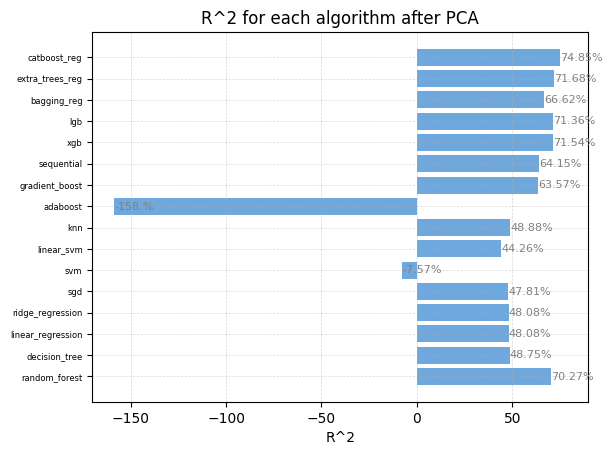

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in r2.values()]
algo = list(r2.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('R^2')
ax.set_title('R^2 for each algorithm after PCA')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('PCA R_2 for each algorithm.png', transparent=True)
plt.show()


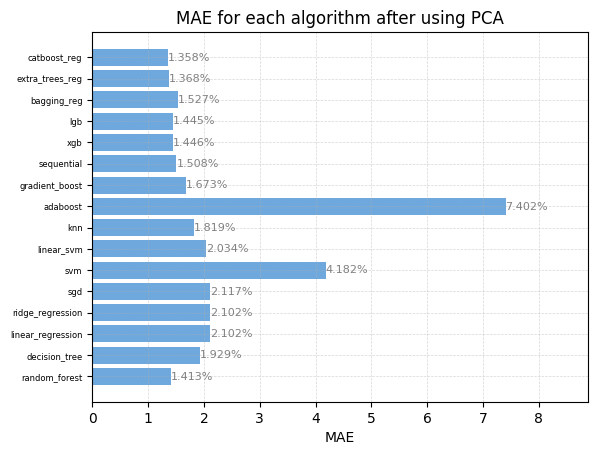

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in mae.values()]
algo = list(mae.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):

    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('MAE')
ax.set_title('MAE for each algorithm after using PCA')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('PCA MAE for each algorithm.png', transparent=True)
plt.show()


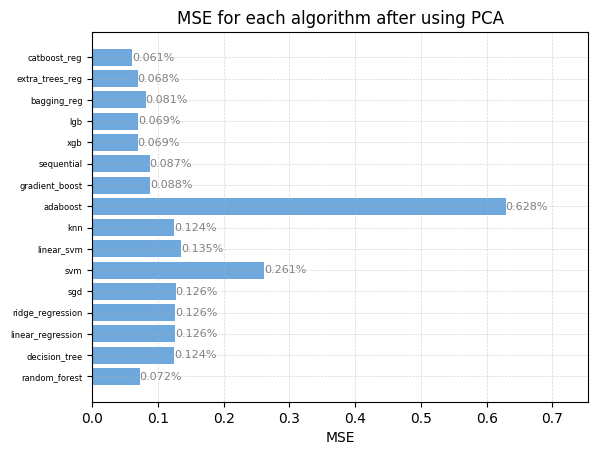

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [x * 100 for x in mse.values()]
algo = list(mse.keys())
color = "#6fa8dcff"

fig, ax = plt.subplots()
bars = ax.barh(np.arange(len(algo)), data, color=color)

for i, bar in enumerate(bars):

    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
            ha='left', va='center', color='gray', fontsize=8)

ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
ax.set_xlabel('MSE')
ax.set_title('MSE for each algorithm after using PCA')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add space on the right side of the chart
plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

plt.savefig('PCA MSE for each algorithm.png', transparent=True)
plt.show()


#Change target

In [ ]:
def mlti_target(df, path, targets=["price"]):
  r2 = {}
  mse = {}
  mae = {}
  for target in targets:
    df = df.sample(frac=1, random_state=42)
    y = df[target].to_numpy()
    X = df.drop(target, axis=1).to_numpy()
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    y_normalized = scaler.fit_transform(y.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
    p=path+target+"/"
    if not os.path.exists(p):
      os.mkdir(p)
    list_model = ['random_forest','decision_tree', 'linear_regression', 'ridge_regression', 'sgd', 'svm', 'linear_svm', 'knn', 'adaboost', 'gradient_boost']
    r2[target], mse[target], mae[target] = train_list_models(list_model, X_train, y_train, X_test, y_test, p)
    print('-------------> '+target)
  return r2, mse, mae

In [ ]:
targets=["bedrooms", "sqft_living", 'sqft_lot', "sqft_above", "sqft_basement"]
r2, mse, mae = mlti_target(df, '/content/drive/MyDrive/hackathon/Models/',targets)

<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm algo has trained
knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained
-------------> bedrooms


<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained
linear_svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained
-------------> sqft_living


<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linear_svm algo has trained
knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained
-------------> sqft_lot


<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained
linear_svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained
-------------> sqft_above


<ipython-input-34-830af48ecf23>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X, y)


random_forest algo has trained
decision_tree algo has trained
linear_regression algo has trained
ridge_regression algo has trained
sgd algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm algo has trained
linear_svm algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


knn algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost algo has trained


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient_boost algo has trained
-------------> sqft_basement


In [ ]:
r2

{'bedrooms': {'random_forest': 0.5315704990090457,
  'decision_tree': -0.02111035376873005,
  'linear_regression': 0.44008022325208396,
  'ridge_regression': 0.43988308028602574,
  'sgd': 0.3592138799036151,
  'svm': 0.44271804796876757,
  'linear_svm': 0.41341802288709273,
  'knn': 0.257508103805404,
  'adaboost': 0.3449833012635045,
  'gradient_boost': 0.5211204036213899},
 'sqft_living': {'random_forest': 0.9989116052752043,
  'decision_tree': 0.9953465652235857,
  'linear_regression': 1.0,
  'ridge_regression': 0.9997224641155166,
  'sgd': 0.8736402624732034,
  'svm': 0.47279531793761165,
  'linear_svm': 0.9999999999787601,
  'knn': 0.7021664304566335,
  'adaboost': 0.9174633089545969,
  'gradient_boost': 0.9980958144185185},
 'sqft_lot': {'random_forest': 0.4887176301301165,
  'decision_tree': -0.03529555095916015,
  'linear_regression': 0.5046007808535125,
  'ridge_regression': 0.5037862899488404,
  'sgd': 0.12940154726163777,
  'svm': -3.1288847299199567,
  'linear_svm': 0.48926

In [ ]:
def catboost_reg(df, path, targets=["price"]):
  r2 = {}
  mse = {}
  mae = {}
  for target in targets:
    df = df.sample(frac=1, random_state=42)
    y = df[target].to_numpy()
    X = df.drop(target, axis=1).to_numpy()
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    y_normalized = scaler.fit_transform(y.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
    p=path+target+"/"
    if not os.path.exists(p):
      os.mkdir(p)
    catboost_reg = cb.CatBoostRegressor(random_state=42)
    catboost_reg.fit(X_train, y_train)
    #catboost_reg.save_model(p+'catboost_reg_model.bin')
    y_pred = catboost_reg.predict(X_test)

    #json_file = p+"catboost_model_data.json"
    model_eval = {"r2":r2_score(y_test, y_pred), "mse": mean_squared_error(y_test, y_pred), "mae": mean_absolute_error(y_test, y_pred)}
    #with open(json_file, "w") as json_file:
    #  json.dump(model_eval, json_file)
    r2[target]=model_eval['r2']
    mse[target]=model_eval['mse']
    mae[target]=model_eval['mae']
    print('-------------> '+target)
  return r2, mse, mae

In [ ]:
targets=["bedrooms", "sqft_living", 'sqft_lot', "sqft_above", "sqft_basement"]
r_2, m_se, m_ae = catboost_reg(df, '/content/drive/MyDrive/hackathon/Models/',targets)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9:	learn: 0.0689474	total: 91.5ms	remaining: 9.06s
10:	learn: 0.0681574	total: 97.8ms	remaining: 8.79s
11:	learn: 0.0674833	total: 105ms	remaining: 8.62s
12:	learn: 0.0668413	total: 114ms	remaining: 8.65s
13:	learn: 0.0662889	total: 129ms	remaining: 9.09s
14:	learn: 0.0657908	total: 141ms	remaining: 9.27s
15:	learn: 0.0652415	total: 149ms	remaining: 9.14s
16:	learn: 0.0647513	total: 156ms	remaining: 9.03s
17:	learn: 0.0643146	total: 164ms	remaining: 8.93s
18:	learn: 0.0639670	total: 170ms	remaining: 8.76s
19:	learn: 0.0635275	total: 177ms	remaining: 8.69s
20:	learn: 0.0631870	total: 189ms	remaining: 8.79s
21:	learn: 0.0628992	total: 195ms	remaining: 8.65s
22:	learn: 0.0625912	total: 202ms	remaining: 8.57s
23:	learn: 0.0623396	total: 209ms	remaining: 8.51s
24:	learn: 0.0620558	total: 217ms	remaining: 8.48s
25:	learn: 0.0617611	total: 225ms	remaining: 8.41s
26:	learn: 0.0615197	total: 231ms	remaining: 8.33s
27:

In [ ]:
for key, val in r_2.items():
  r2[key]['catboost_reg'] = val

In [ ]:
for key, val in m_se.items():
  mse[key]['catboost_reg'] = val
for key, val in m_ae.items():
  mae[key]['catboost_reg'] = val

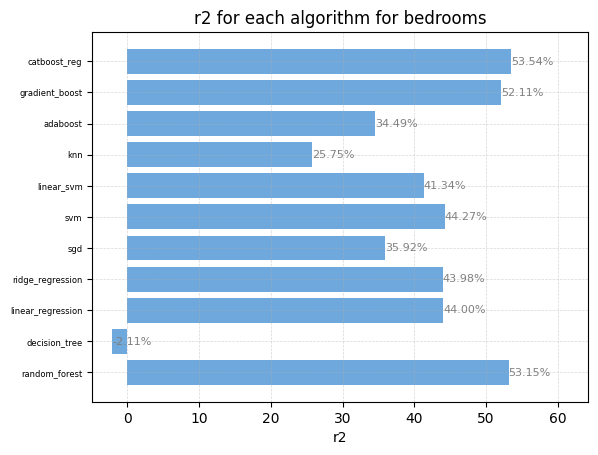

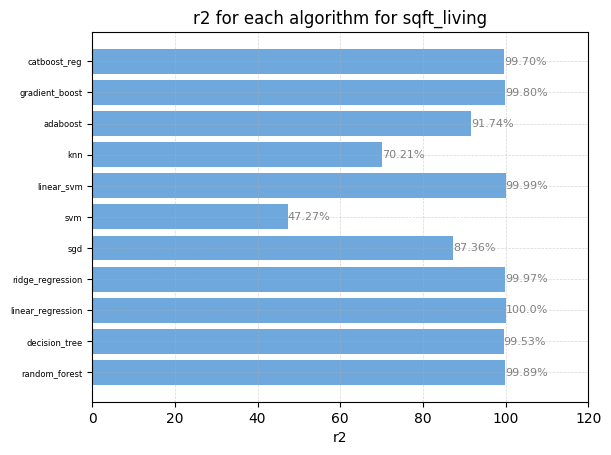

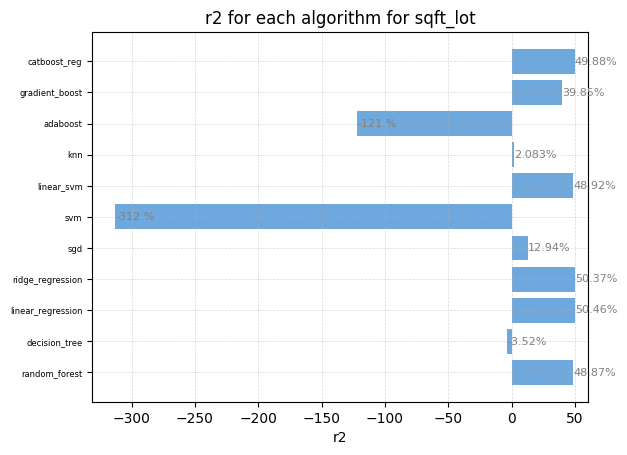

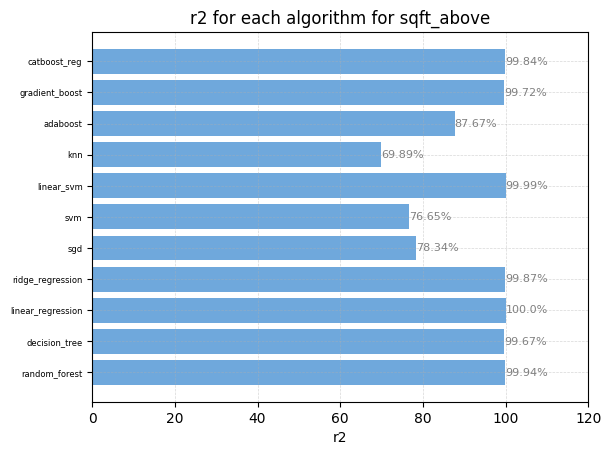

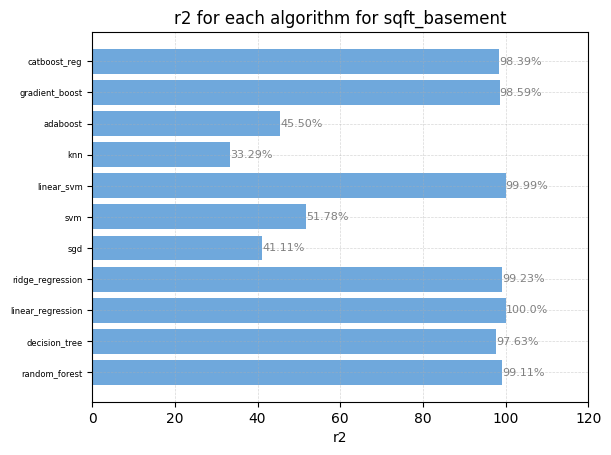

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for key, val in r2.items():
  data = [x * 100 for x in val.values()]
  algo = list(val.keys())
  color = "#6fa8dcff"

  fig, ax = plt.subplots()
  bars = ax.barh(np.arange(len(algo)), data, color=color)

  for i, bar in enumerate(bars):

      ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
              ha='left', va='center', color='gray', fontsize=8)

  ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
  ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
  ax.set_xlabel('r2')
  ax.set_title(f'r2 for each algorithm for {key}')
  ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

  # Add space on the right side of the chart
  plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

  plt.savefig(f'r2 for each algorithm {key}.png', transparent=True)
  plt.show()

In [ ]:
for key, val in r2.items():
  print(val)

{'random_forest': 0.5315704990090457, 'decision_tree': -0.02111035376873005, 'linear_regression': 0.44008022325208396, 'ridge_regression': 0.43988308028602574, 'sgd': 0.3592138799036151, 'svm': 0.44271804796876757, 'linear_svm': 0.41341802288709273, 'knn': 0.257508103805404, 'adaboost': 0.3449833012635045, 'gradient_boost': 0.5211204036213899, 'catboost_reg': 0.5354481047972458}
{'random_forest': 0.9989116052752043, 'decision_tree': 0.9953465652235857, 'linear_regression': 1.0, 'ridge_regression': 0.9997224641155166, 'sgd': 0.8736402624732034, 'svm': 0.47279531793761165, 'linear_svm': 0.9999999999787601, 'knn': 0.7021664304566335, 'adaboost': 0.9174633089545969, 'gradient_boost': 0.9980958144185185, 'catboost_reg': 0.9970507510714794}
{'random_forest': 0.4887176301301165, 'decision_tree': -0.03529555095916015, 'linear_regression': 0.5046007808535125, 'ridge_regression': 0.5037862899488404, 'sgd': 0.12940154726163777, 'svm': -3.1288847299199567, 'linear_svm': 0.4892627491859157, 'knn': 

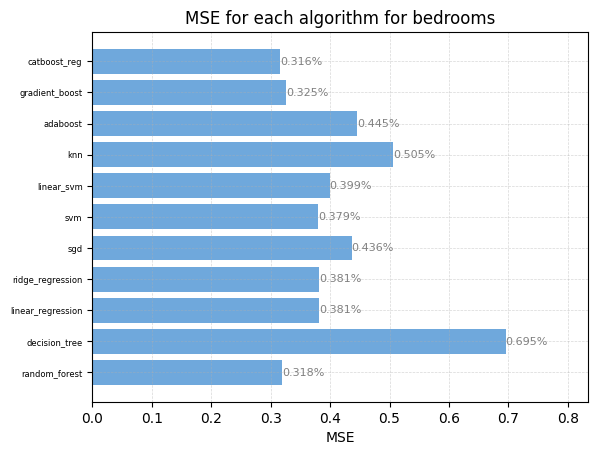

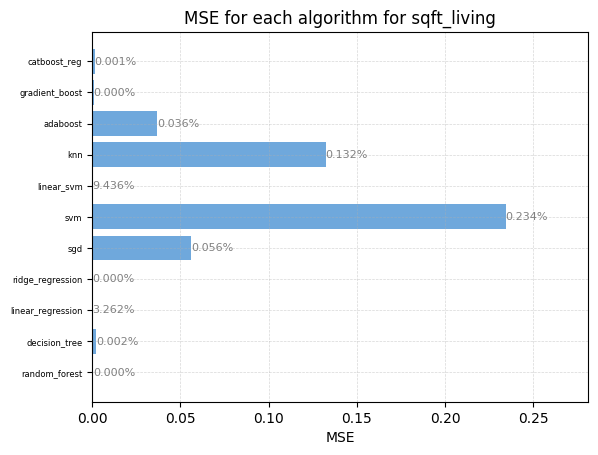

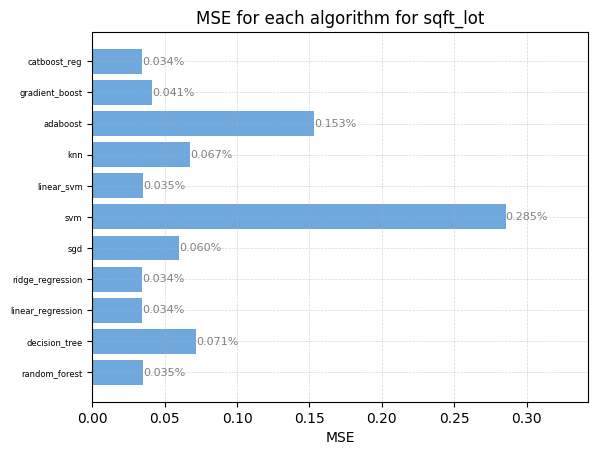

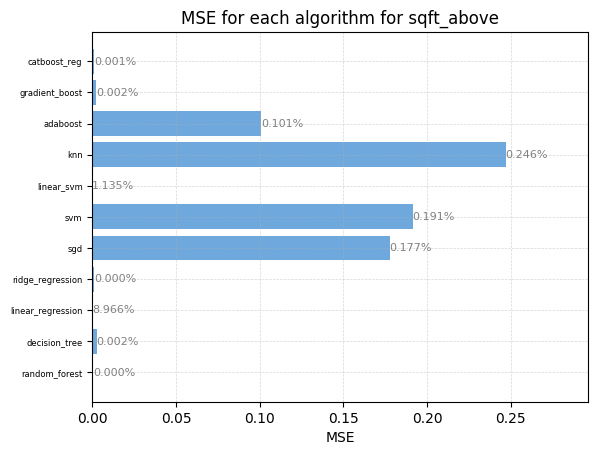

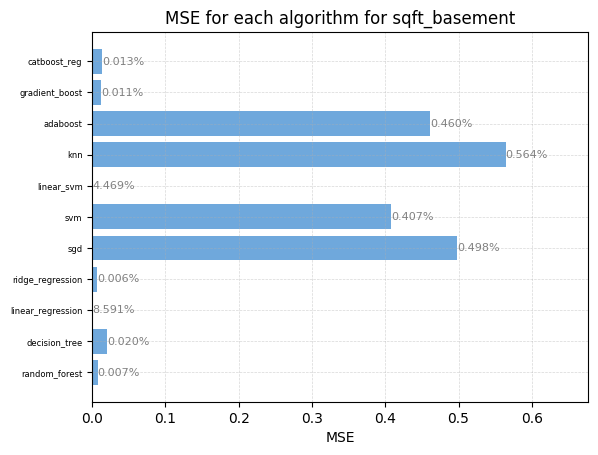

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for key, val in mse.items():
  data = [x * 100 for x in val.values()]
  algo = list(val.keys())
  color = "#6fa8dcff"

  fig, ax = plt.subplots()
  bars = ax.barh(np.arange(len(algo)), data, color=color)

  for i, bar in enumerate(bars):

      ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
              ha='left', va='center', color='gray', fontsize=8)

  ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
  ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
  ax.set_xlabel('MSE')
  ax.set_title(f'MSE for each algorithm for {key}')
  ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

  # Add space on the right side of the chart
  plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

  plt.savefig(f'MSE for each algorithm {key}.png', transparent=True)
  plt.show()

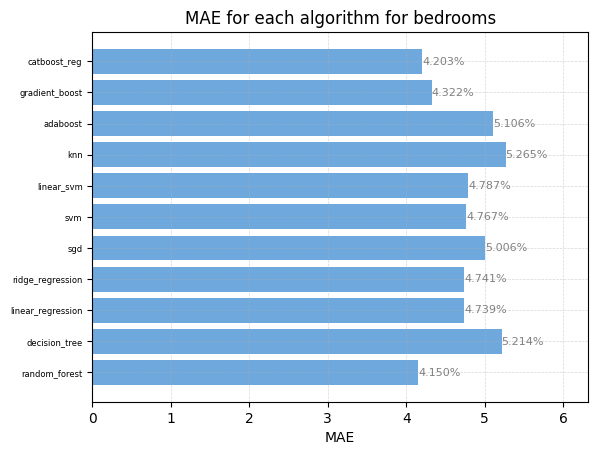

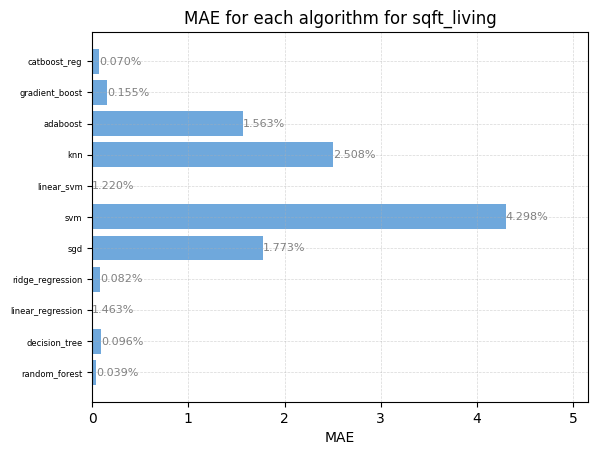

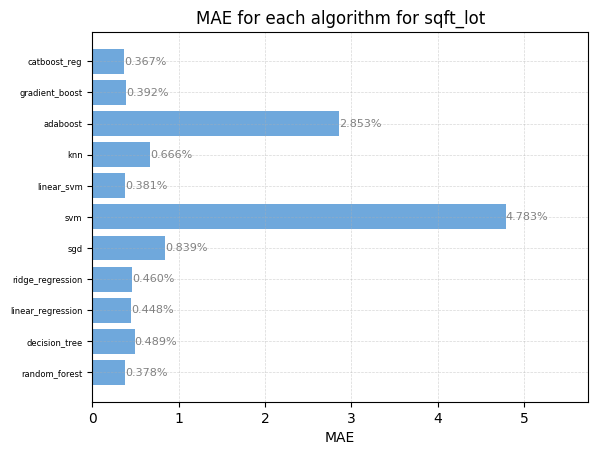

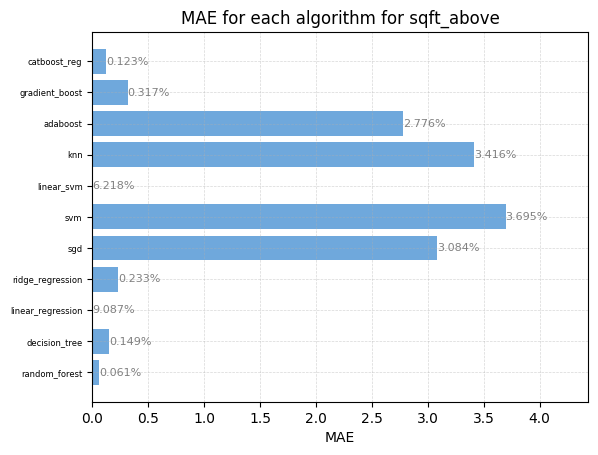

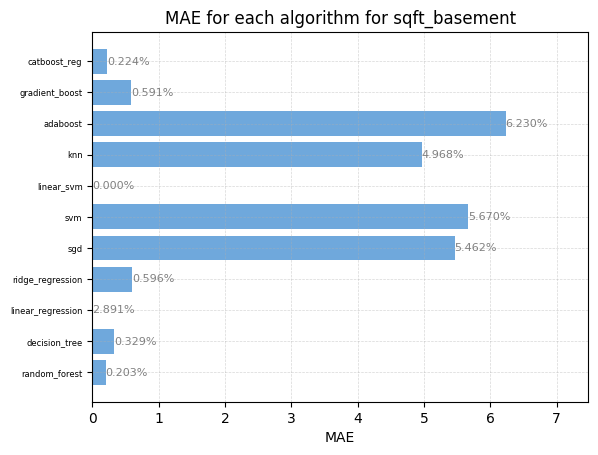

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for key, val in mae.items():
  data = [x * 100 for x in val.values()]
  algo = list(val.keys())
  color = "#6fa8dcff"

  fig, ax = plt.subplots()
  bars = ax.barh(np.arange(len(algo)), data, color=color)

  for i, bar in enumerate(bars):

      ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(data[i])[:5] + '%',
              ha='left', va='center', color='gray', fontsize=8)

  ax.set_yticks(np.arange(len(algo)))  # Set y-ticks at each index position
  ax.set_yticklabels(algo, fontsize=6)  # Set y-tick labels as algorithm names
  ax.set_xlabel('MAE')
  ax.set_title(f'MAE for each algorithm for {key}')
  ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

  # Add space on the right side of the chart
  plt.xlim(right=max(data) * 1.2)  # Adjust the multiplier as desired

  plt.savefig(f'MAE for each algorithm {key}.png', transparent=True)
  plt.show()

In [ ]:
mae['sqft_living']

{'random_forest': 0.0003974327049846438,
 'decision_tree': 0.0009606314337352823,
 'linear_regression': 1.4631381066102344e-16,
 'ridge_regression': 0.0008289611624785717,
 'sgd': 0.017738854556174452,
 'svm': 0.04298945937987705,
 'linear_svm': 1.2200639931968369e-07,
 'knn': 0.02508964228650258,
 'adaboost': 0.015639846042627137,
 'gradient_boost': 0.0015575651559129628,
 'catboost_reg': 0.0007017549299434482}